In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def initialize_params(X):
    n,m=X.shape
    W=np.zeros((1,n))
    b=0
    return (W,b)

In [13]:
X = np.random.randn(14,29305)
W,b = initialize_params(X)
print('W = ', W)
print('b = ',b)
W.shape

W =  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
b =  0


(1, 14)

In [14]:
def sigmoid(Z):
    sigmoid = None
    return 1/(1+np.exp(-Z))

In [15]:
def forward_prop(X,W,b):
    Z = np.dot(W,X)+b
    A = sigmoid(Z)  
    forward_cache = (A,Z)
    return forward_cache

In [16]:
def compute_cost(A, Y):
        for i in range (A.size):
            if(A[0][i]==0):
                A[0][i]=0.5
            if(A[0][i]==1):
                A[0][i]=0.5
        m = A.shape[1]
        cost = (np.dot(np.log(A),Y.T) + np.dot(np.log(1-A),(1-Y.T)))/(-m)
        return np.squeeze(cost)

In [17]:
def back_prop(X, Y, forward_cache):
    m = X.shape[1]
    A = forward_cache[0]
    dZ = A - Y
    dW = np.dot(X,dZ.T).T/m
    db = np.sum(dZ)/m
    backward_cache = (dW, db)
    return backward_cache

In [18]:
df = pd.read_csv('dataset.csv')

In [19]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',1)
ds=ds.replace('b',2)
ds=ds.replace('c',3)
ds=ds.replace('d',4)
ds=ds.replace('e',5)
ds=ds.replace('f',6)
ds=ds.replace('g',7)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[:29305,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [20]:
def logistic_regression_model(X, y, iterations=1500, alpha = 0.001):
    m = X.shape[1]
    n = X.shape[0]
    W,b = initialize_params(X)
    costs = []
    iters = []
    for i in range(iterations):
        forward_cache = forward_prop(X,W,b)
        A = forward_cache[0]
        Z = forward_cache[1]
        cost = compute_cost(A,y)
        costs.append(cost)
        iters.append(i+1)
        if (i+1)%100==0:
            print('Cost after ',(i+1),' iterations: ',cost)
        backward_cache = back_prop(X,y,forward_cache)
        dW = backward_cache[0]
        db = backward_cache[1]
        W = W - (alpha * dW)
        b = b - (alpha * db)
    return W,b,costs,iters

In [21]:
W,b,costs,iters = logistic_regression_model(X, y, iterations=1500,alpha = 0.01)
print(W,b)

Cost after  100  iterations:  0.5289370692617313
Cost after  200  iterations:  0.5222489236804291
Cost after  300  iterations:  0.5178216523468507
Cost after  400  iterations:  0.5145714614120841
Cost after  500  iterations:  0.5120175200685058
Cost after  600  iterations:  0.5099031049176509
Cost after  700  iterations:  0.5080793694873877
Cost after  800  iterations:  0.506456376246042
Cost after  900  iterations:  0.5049782314269791
Cost after  1000  iterations:  0.5036093023380346
Cost after  1100  iterations:  0.5023262608354702
Cost after  1200  iterations:  0.5011133826977551
Cost after  1300  iterations:  0.4999597233607531
Cost after  1400  iterations:  0.4988573965553319
Cost after  1500  iterations:  0.49780051132524455
[[-7.41901905e-04  3.83495571e+01  2.67115900e-01 -4.91125477e-02
   9.90467276e-02 -7.90418086e-03  1.73752799e-01 -8.35925123e-02
  -4.91413689e-01 -3.05304972e-01 -1.58833500e-01 -7.28907494e-03
   2.07351672e-01  1.27792442e-01]] -0.04585460745593291


In [22]:
def get_accuracy(W,b,X,y):
    A,Z = forward_prop(X,W,b)
    predicted = np.int32(A>=0.5)
    difference = np.abs(y-predicted)
    m = y.shape[1]
    percentage_accuracy = (1 - (np.sum(difference)/m))*100
    print('Accuracy: ',percentage_accuracy,'% ')

In [23]:
get_accuracy(W,b,X,y)

Accuracy:  76.29836893468914 % 


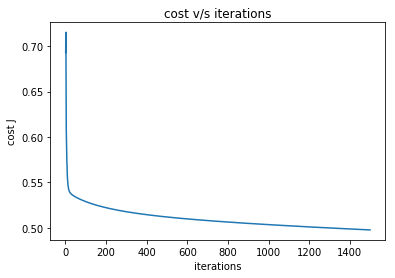

In [24]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

In [26]:
df = pd.read_csv('dataset.csv')

In [27]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',0)
ds=ds.replace('b',1)
ds=ds.replace('c',2)
ds=ds.replace('d',3)
ds=ds.replace('e',4)
ds=ds.replace('f',5)
ds=ds.replace('g',6)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[29306:32562,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [28]:
get_accuracy(W,b,X,y)

Accuracy:  74.59293394777265 % 


In [30]:
df = pd.read_csv('dataset.csv')

In [31]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',1)
ds=ds.replace('b',2)
ds=ds.replace('c',3)
ds=ds.replace('d',4)
ds=ds.replace('e',5)
ds=ds.replace('f',6)
ds=ds.replace('g',7)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[:29305,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [32]:
W,b,costs,iters = logistic_regression_model(X, y, iterations=1500,alpha = 0.001)
print(W,b)

Cost after  100  iterations:  0.5535005975766872
Cost after  200  iterations:  0.5396836582938356
Cost after  300  iterations:  0.5368383739662987
Cost after  400  iterations:  0.5352553854470161
Cost after  500  iterations:  0.5339497650085234
Cost after  600  iterations:  0.5327735824840303
Cost after  700  iterations:  0.5316919041709033
Cost after  800  iterations:  0.5306882623564981
Cost after  900  iterations:  0.5297512636710481
Cost after  1000  iterations:  0.5288721945309122
Cost after  1100  iterations:  0.5280441851412015
Cost after  1200  iterations:  0.5272616976661556
Cost after  1300  iterations:  0.5265201700147986
Cost after  1400  iterations:  0.5258157682621151
Cost after  1500  iterations:  0.5251452154957881
[[-4.01150477e-02  3.82711790e+00  1.52306103e-02 -1.09013571e-02
   1.02503308e-02 -1.46273621e-02 -1.28680335e-02 -8.73524400e-02
  -9.67867634e-02 -1.64150973e-01 -5.06307854e-02 -3.46514481e-03
   1.84649212e-02  6.29331971e-03]] -0.02700023890055199


In [33]:
get_accuracy(W,b,X,y)

Accuracy:  75.99808912850611 % 


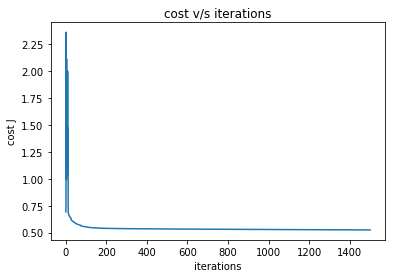

In [34]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

In [36]:
df = pd.read_csv('dataset.csv')

In [40]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',0)
ds=ds.replace('b',1)
ds=ds.replace('c',2)
ds=ds.replace('d',3)
ds=ds.replace('e',4)
ds=ds.replace('f',5)
ds=ds.replace('g',6)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[29306:32562,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [41]:
get_accuracy(W,b,X,y)

Accuracy:  76.036866359447 % 


In [42]:
df = pd.read_csv('dataset.csv')

In [43]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',1)
ds=ds.replace('b',2)
ds=ds.replace('c',3)
ds=ds.replace('d',4)
ds=ds.replace('e',5)
ds=ds.replace('f',6)
ds=ds.replace('g',7)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[:29305,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [44]:
W,b,costs,iters = logistic_regression_model(X, y, iterations=1500,alpha = 0.01)
print(W,b)

Cost after  100  iterations:  0.5289370692617313
Cost after  200  iterations:  0.5222489236804291
Cost after  300  iterations:  0.5178216523468507
Cost after  400  iterations:  0.5145714614120841
Cost after  500  iterations:  0.5120175200685058
Cost after  600  iterations:  0.5099031049176509
Cost after  700  iterations:  0.5080793694873877
Cost after  800  iterations:  0.506456376246042
Cost after  900  iterations:  0.5049782314269791
Cost after  1000  iterations:  0.5036093023380346
Cost after  1100  iterations:  0.5023262608354702
Cost after  1200  iterations:  0.5011133826977551
Cost after  1300  iterations:  0.4999597233607531
Cost after  1400  iterations:  0.4988573965553319
Cost after  1500  iterations:  0.49780051132524455
[[-7.41901905e-04  3.83495571e+01  2.67115900e-01 -4.91125477e-02
   9.90467276e-02 -7.90418086e-03  1.73752799e-01 -8.35925123e-02
  -4.91413689e-01 -3.05304972e-01 -1.58833500e-01 -7.28907494e-03
   2.07351672e-01  1.27792442e-01]] -0.04585460745593291


In [45]:
get_accuracy(W,b,X,y)

Accuracy:  76.29836893468914 % 


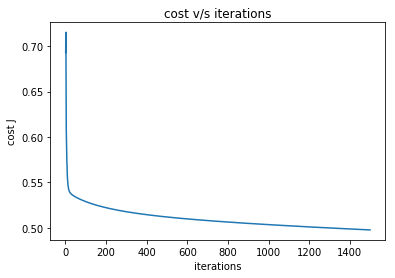

In [46]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

In [47]:
df = pd.read_csv('dataset.csv')

In [48]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',0)
ds=ds.replace('b',1)
ds=ds.replace('c',2)
ds=ds.replace('d',3)
ds=ds.replace('e',4)
ds=ds.replace('f',5)
ds=ds.replace('g',6)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[29306:32562,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [49]:
get_accuracy(W,b,X,y)

Accuracy:  74.59293394777265 % 


In [50]:
df = pd.read_csv('dataset.csv')

In [51]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',1)
ds=ds.replace('b',2)
ds=ds.replace('c',3)
ds=ds.replace('d',4)
ds=ds.replace('e',5)
ds=ds.replace('f',6)
ds=ds.replace('g',7)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[:29305,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [52]:
W,b,costs,iters = logistic_regression_model(X, y, iterations=1500,alpha = 0.001)
print(W,b)

Cost after  100  iterations:  0.5535005975766872
Cost after  200  iterations:  0.5396836582938356
Cost after  300  iterations:  0.5368383739662987
Cost after  400  iterations:  0.5352553854470161
Cost after  500  iterations:  0.5339497650085234
Cost after  600  iterations:  0.5327735824840303
Cost after  700  iterations:  0.5316919041709033
Cost after  800  iterations:  0.5306882623564981
Cost after  900  iterations:  0.5297512636710481
Cost after  1000  iterations:  0.5288721945309122
Cost after  1100  iterations:  0.5280441851412015
Cost after  1200  iterations:  0.5272616976661556
Cost after  1300  iterations:  0.5265201700147986
Cost after  1400  iterations:  0.5258157682621151
Cost after  1500  iterations:  0.5251452154957881
[[-4.01150477e-02  3.82711790e+00  1.52306103e-02 -1.09013571e-02
   1.02503308e-02 -1.46273621e-02 -1.28680335e-02 -8.73524400e-02
  -9.67867634e-02 -1.64150973e-01 -5.06307854e-02 -3.46514481e-03
   1.84649212e-02  6.29331971e-03]] -0.02700023890055199


In [53]:
get_accuracy(W,b,X,y)

Accuracy:  75.99808912850611 % 


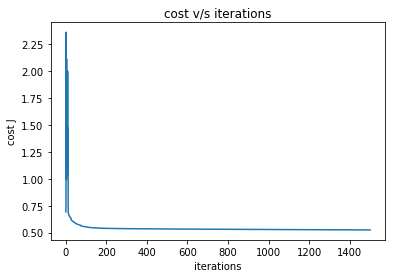

In [54]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

In [55]:
df = pd.read_csv('dataset.csv')

In [56]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',0)
ds=ds.replace('b',1)
ds=ds.replace('c',2)
ds=ds.replace('d',3)
ds=ds.replace('e',4)
ds=ds.replace('f',5)
ds=ds.replace('g',6)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[29306:32562,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [57]:
get_accuracy(W,b,X,y)

Accuracy:  76.036866359447 % 


In [58]:
df = pd.read_csv('dataset.csv')

In [59]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',1)
ds=ds.replace('b',2)
ds=ds.replace('c',3)
ds=ds.replace('d',4)
ds=ds.replace('e',5)
ds=ds.replace('f',6)
ds=ds.replace('g',7)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[:29305,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [60]:
W,b,costs,iters = logistic_regression_model(X, y, iterations=1500,alpha = 0.001)
print(W,b)

Cost after  100  iterations:  0.5535005975766872
Cost after  200  iterations:  0.5396836582938356
Cost after  300  iterations:  0.5368383739662987
Cost after  400  iterations:  0.5352553854470161
Cost after  500  iterations:  0.5339497650085234
Cost after  600  iterations:  0.5327735824840303
Cost after  700  iterations:  0.5316919041709033
Cost after  800  iterations:  0.5306882623564981
Cost after  900  iterations:  0.5297512636710481
Cost after  1000  iterations:  0.5288721945309122
Cost after  1100  iterations:  0.5280441851412015
Cost after  1200  iterations:  0.5272616976661556
Cost after  1300  iterations:  0.5265201700147986
Cost after  1400  iterations:  0.5258157682621151
Cost after  1500  iterations:  0.5251452154957881
[[-4.01150477e-02  3.82711790e+00  1.52306103e-02 -1.09013571e-02
   1.02503308e-02 -1.46273621e-02 -1.28680335e-02 -8.73524400e-02
  -9.67867634e-02 -1.64150973e-01 -5.06307854e-02 -3.46514481e-03
   1.84649212e-02  6.29331971e-03]] -0.02700023890055199


In [61]:
get_accuracy(W,b,X,y)

Accuracy:  75.99808912850611 % 


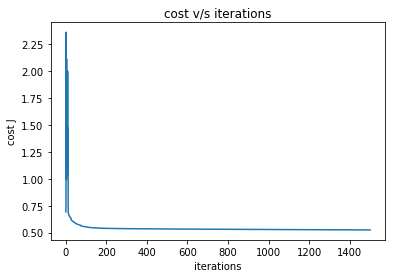

In [62]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

In [63]:
df = pd.read_csv('dataset.csv')

In [64]:
ds=df.copy()
ds['col6']=ds['col6'].fillna(ds['col6'].mode()[0])
ds['col7']=ds['col7'].fillna(ds['col7'].mean())
ds['col8']=ds['col8'].fillna(ds['col8'].mean())
ds=ds.replace('a',0)
ds=ds.replace('b',1)
ds=ds.replace('c',2)
ds=ds.replace('d',3)
ds=ds.replace('e',4)
ds=ds.replace('f',5)
ds=ds.replace('g',6)
ds['col3']=(ds['col3']-ds['col3'].min())/(ds['col3'].max()-ds['col3'].min())
ds['col4']=(ds['col4']-ds['col4'].min())/(ds['col4'].max()-ds['col4'].min())
ds['col5']=(ds['col5']-ds['col5'].min())/(ds['col5'].max()-ds['col5'].min())
ds['col12']=(ds['col12']-ds['col12'].min())/(ds['col12'].max()-ds['col12'].min())
ds['col13']=(ds['col13']-ds['col13'].min())/(ds['col13'].max()-ds['col13'].min())
ds['col14']=(ds['col14']-ds['col14'].min())/(ds['col14'].max()-ds['col14'].min())
ds=ds.loc[29306:32562,:]
y = np.array(ds['target'])
y = y.reshape((1,y.shape[0]))
X = np.array([ds['col1'],ds['col2'],ds['col3'],ds['col4'],ds['col5'],ds['col6'],ds['col7'],ds['col8'],ds['col9'],ds['col10'],ds['col11'],ds['col12'],ds['col13'],ds['col14']])

In [65]:
get_accuracy(W,b,X,y)

Accuracy:  76.036866359447 % 
